In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier

In [106]:
#genrate random data
np.random.seed(42)
x=np.random.rand(100,1) - 0.5
y=3*x[:,0]**2 + 0.5 * np.random.randn(100)

In [12]:
df=pd.DataFrame()

In [14]:
df["x"]=x.reshape(100)
df["y"] =y

In [17]:
df

,x,y
0,-0.125460,0.090744
1,0.450714,0.459926
2,0.231994,0.207344
3,0.098658,-0.964584
4,-0.343981,0.245134
...,...,...
95,-0.006204,-0.407790
96,0.022733,-0.037001
97,-0.072459,0.186327
98,-0.474581,0.814026


In [18]:
df["M1_prediction"] = df["y"].mean()

In [19]:
df

,x,y,M1_prediction
0,-0.125460,0.090744,0.264972
1,0.450714,0.459926,0.264972
2,0.231994,0.207344,0.264972
3,0.098658,-0.964584,0.264972
4,-0.343981,0.245134,0.264972
...,...,...,...
95,-0.006204,-0.407790,0.264972
96,0.022733,-0.037001,0.264972
97,-0.072459,0.186327,0.264972
98,-0.474581,0.814026,0.264972


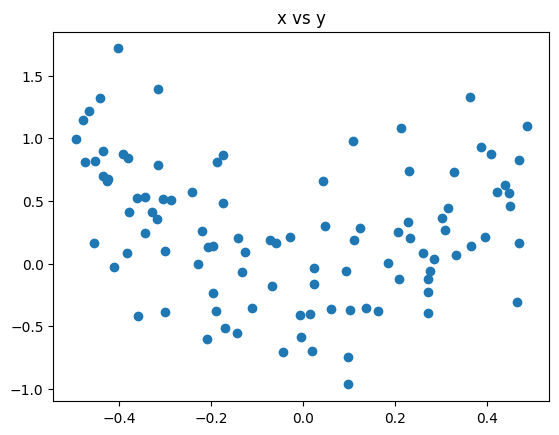

In [32]:
plt.scatter(df["x"],df["y"])
plt.title("x vs y")
plt.show()

In [34]:
df["residual_1"] = df["y"] - df["M1_prediction"]
df

,x,y,M1_prediction,residual_1
0,-0.125460,0.090744,0.264972,-0.174228
1,0.450714,0.459926,0.264972,0.194954
2,0.231994,0.207344,0.264972,-0.057628
3,0.098658,-0.964584,0.264972,-1.229556
4,-0.343981,0.245134,0.264972,-0.019839
...,...,...,...,...
95,-0.006204,-0.407790,0.264972,-0.672762
96,0.022733,-0.037001,0.264972,-0.301973
97,-0.072459,0.186327,0.264972,-0.078645
98,-0.474581,0.814026,0.264972,0.549054


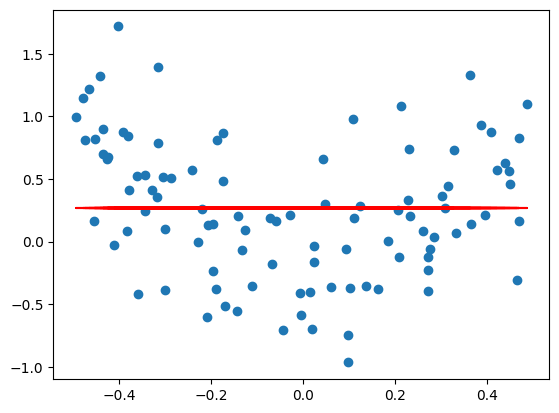

In [79]:
plt.scatter(df["x"],df["y"])
plt.plot(df["x"],df["M1_prediction"],color="red")

In [84]:
from sklearn.tree import DecisionTreeRegressor

In [85]:
dt=DecisionTreeRegressor(max_leaf_nodes=8)

In [86]:
x=df["x"]
y=df["residual_1"]

In [87]:
dt.fit(df["x"].values.reshape(100,1),df["residual_1"].values.reshape(100,1))

DecisionTreeRegressor(max_leaf_nodes=8)

In [88]:
from sklearn.tree import plot_tree

[Text(0.5, 0.9166666666666666, 'x[0] <= -0.303\nsquared_error = 0.297\nsamples = 100\nvalue = 0.0'),
 Text(0.2, 0.75, 'x[0] <= -0.388\nsquared_error = 0.216\nsamples = 26\nvalue = 0.414'),
 Text(0.1, 0.5833333333333334, 'squared_error = 0.183\nsamples = 14\nvalue = 0.591'),
 Text(0.3, 0.5833333333333334, 'x[0] <= -0.317\nsquared_error = 0.176\nsamples = 12\nvalue = 0.208'),
 Text(0.2, 0.4166666666666667, 'squared_error = 0.109\nsamples = 9\nvalue = 0.067'),
 Text(0.4, 0.4166666666666667, 'squared_error = 0.135\nsamples = 3\nvalue = 0.632'),
 Text(0.8, 0.75, 'x[0] <= 0.294\nsquared_error = 0.244\nsamples = 74\nvalue = -0.146'),
 Text(0.7, 0.5833333333333334, 'x[0] <= 0.104\nsquared_error = 0.204\nsamples = 56\nvalue = -0.275'),
 Text(0.6, 0.4166666666666667, 'x[0] <= -0.172\nsquared_error = 0.201\nsamples = 38\nvalue = -0.346'),
 Text(0.5, 0.25, 'x[0] <= -0.189\nsquared_error = 0.191\nsamples = 14\nvalue = -0.104'),
 Text(0.4, 0.08333333333333333, 'squared_error = 0.128\nsamples = 11\nv

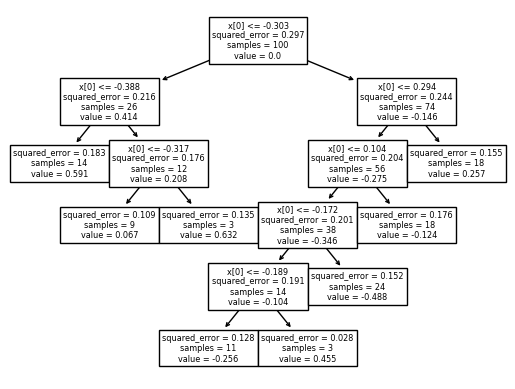

In [89]:
plot_tree(dt)

In [90]:
x_test=np.linspace(-0.5,0.5,500)

In [91]:
y_pred = 0.264972 + dt.predict(x_test.reshape(500,1))

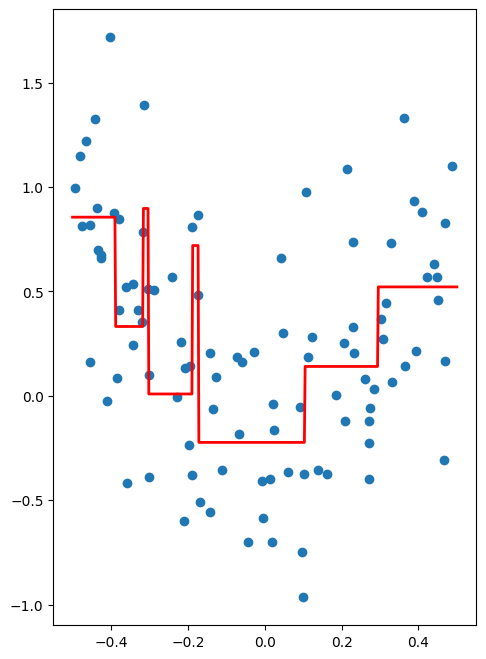

In [94]:
plt.figure(figsize=(12,8))
plt.subplot(121)
plt.plot(x_test,y_pred,linewidth=2,color="red")
plt.scatter(df["x"],df["y"])

In [95]:
df["prediction2"] = 0.264972 + dt.predict(df["x"].values.reshape(100,1))

In [96]:
df

,x,y,M1_prediction,residual_1,prediction2
0,-0.125460,0.090744,0.264972,-0.174228,-0.222903
1,0.450714,0.459926,0.264972,0.194954,0.521751
2,0.231994,0.207344,0.264972,-0.057628,0.140799
3,0.098658,-0.964584,0.264972,-1.229556,-0.222903
4,-0.343981,0.245134,0.264972,-0.019839,0.332139
...,...,...,...,...,...
95,-0.006204,-0.407790,0.264972,-0.672762,-0.222903
96,0.022733,-0.037001,0.264972,-0.301973,-0.222903
97,-0.072459,0.186327,0.264972,-0.078645,-0.222903
98,-0.474581,0.814026,0.264972,0.549054,0.855757


In [97]:
df["residual2"] = df["y"] - df["prediction2"]

In [98]:
df

,x,y,M1_prediction,residual_1,prediction2,residual2
0,-0.125460,0.090744,0.264972,-0.174228,-0.222903,0.313648
1,0.450714,0.459926,0.264972,0.194954,0.521751,-0.061825
2,0.231994,0.207344,0.264972,-0.057628,0.140799,0.066545
3,0.098658,-0.964584,0.264972,-1.229556,-0.222903,-0.741681
4,-0.343981,0.245134,0.264972,-0.019839,0.332139,-0.087005
...,...,...,...,...,...,...
95,-0.006204,-0.407790,0.264972,-0.672762,-0.222903,-0.184886
96,0.022733,-0.037001,0.264972,-0.301973,-0.222903,0.185903
97,-0.072459,0.186327,0.264972,-0.078645,-0.222903,0.409230
98,-0.474581,0.814026,0.264972,0.549054,0.855757,-0.041731


In [100]:
tree2=DecisionTreeRegressor(max_leaf_nodes=8)
tree2.fit(df["x"].values.reshape(100,1),df["residual2"].values)

DecisionTreeRegressor(max_leaf_nodes=8)

[Text(0.5, 0.9285714285714286, 'x[0] <= 0.47\nsquared_error = 0.15\nsamples = 100\nvalue = 0.0'),
 Text(0.375, 0.7857142857142857, 'x[0] <= 0.458\nsquared_error = 0.149\nsamples = 98\nvalue = -0.009'),
 Text(0.25, 0.6428571428571429, 'x[0] <= -0.46\nsquared_error = 0.144\nsamples = 96\nvalue = 0.003'),
 Text(0.125, 0.5, 'squared_error = 0.024\nsamples = 4\nvalue = 0.189'),
 Text(0.375, 0.5, 'x[0] <= -0.454\nsquared_error = 0.147\nsamples = 92\nvalue = -0.005'),
 Text(0.25, 0.35714285714285715, 'squared_error = 0.0\nsamples = 1\nvalue = -0.695'),
 Text(0.5, 0.35714285714285715, 'x[0] <= -0.407\nsquared_error = 0.144\nsamples = 91\nvalue = 0.003'),
 Text(0.25, 0.21428571428571427, 'x[0] <= -0.418\nsquared_error = 0.138\nsamples = 7\nvalue = -0.134'),
 Text(0.125, 0.07142857142857142, 'squared_error = 0.053\nsamples = 6\nvalue = -0.01'),
 Text(0.375, 0.07142857142857142, 'squared_error = 0.0\nsamples = 1\nvalue = -0.879'),
 Text(0.75, 0.21428571428571427, 'x[0] <= -0.397\nsquared_error = 

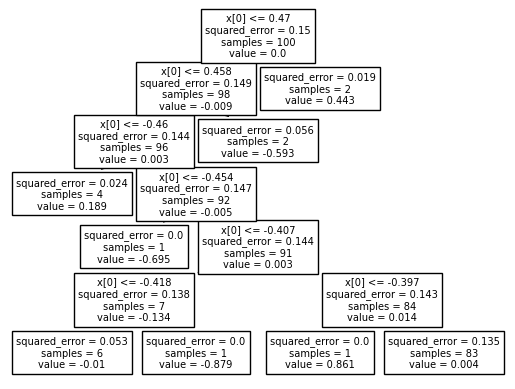

In [101]:
plot_tree(tree2)

In [102]:
y_pred  = 0.264972 + sum(regressor.predict(x_test.reshape(-1,1)) for regressor in [dt,tree2])

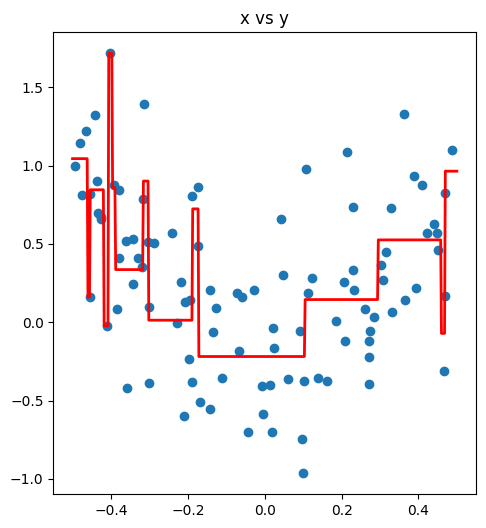

In [105]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(x_test,y_pred,linewidth=2,color="red")
plt.scatter(df["x"],df["y"])
plt.title("x vs y")
plt.show()